PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within seconds in your choice of notebook environment.

In this notebook I'm going to surf around various methods available in pycaret library. As I'm a newbie to this library this notebook will serve as a tutorial for all the people who want to learn this new uber cool library.

The Agenda is very simple:
1. Report Creation<br/>
2. Preprocessing<br/>
3. Checking different models
4. Fixing final models
5. Different model plots
6. Prediction with the final model
7. Saving the model

If you like this notebook consider upvoting it.....

**<center>Let's Start</center>**

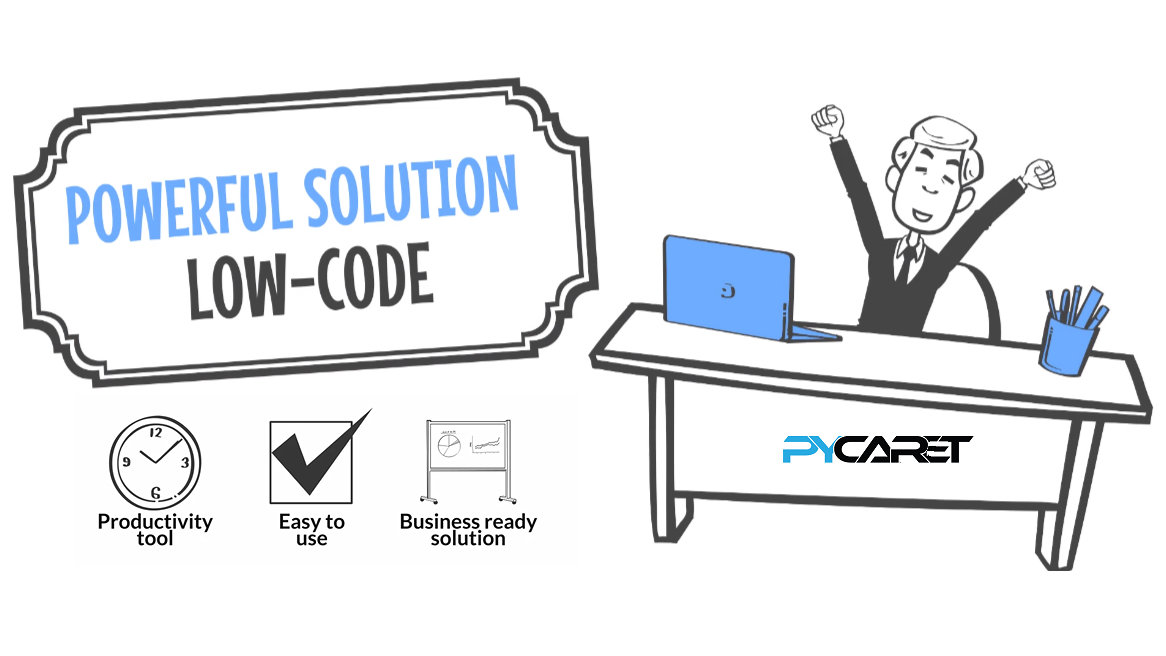

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train  = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

In [ ]:
!pip install pycaret

In [ ]:
from pandas_profiling import ProfileReport
from pycaret.classification import *

In [ ]:
train_report = ProfileReport(train)

In [ ]:
train_report

# BEFORE PREPROCESSING

In [ ]:
train_setup = setup(train,target ='price_range')

**PREPROCESSING STEPS:**<br/>
1)Train Test Split<br/>
2)One Hot Encoding<br/>
3)Normalization<br/>
4)Removing Multicolinearity<br/>
5)Principal Component Analysis<br/>
6)Ignoring Low Variance<br/>

**Train Test Split<br/>**

Goal in machine learning is to build a model that generalizes well to the new data. Hence the dataset is split into the Train dataset and the Test dataset during supervised machine learning experiment. Test dataset serves as a proxy for new data.Test dataset (also known as hold-out set) is not used in training of models and hence can be used to evaluate metrics and determine if the model has over-fitted the data.

**Parameters in setup method:**

train_size: float, default = 0.7
Size of the training set. By default, 70% of the data will be used for training and validation. The remaining data will be used for a test / hold-out set.

**One hot encoding**

Machine learning algorithms cannot work directly with categorical data and they must be transformed into numeric values before training a model. Most common type of categorical encoding is One Hot Encoding (also known as dummy encoding) where each categorical level becomes a separate feature in the dataset containing binary values (1 or 0).PyCaret will transform all categorical features in dataset using one hot encoding.One Hot Encoding works on all features that are either inferred as categorical or are forced as categorical using categorical_features parameter within setup.

**Parameters in setup method:**<br/>

categorical_features: string, default = None
If the inferred data types are not correct, categorical_features can be used to overwrite the inferred type. If when running setup the type of ‘column1’ is inferred as numeric instead of categorical, then this parameter can be used to overwrite the type by passing categorical_features = ['column1']






**Normalization<br/>**
Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to rescale the values of numeric columns in the dataset without distorting differences in the ranges of values or losing information. 

**Parameters in setup**<br/>

normalize: bool, default = False
When set to True, the feature space is transformed using the normalized_method param. 

<u>Various normalize methods</u>:
* z-score : The standard zscore is calculated as z = (x – u) / s
* minmax : scales and translates each feature individually such that it is in the range of 0 – 1.
* maxabs : scales and translates each feature individually such that the maximal absolute value of each feature will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.
* robust : scales and translates each feature according to the Interquartile range. When the dataset contains outliers, robust scaler often gives better results.



**Removing Multi-Collinearity**<br/>
Multicollinearity (also called collinearity) is a phenomenon in which one feature variable in the dataset is highly linearly correlated with another feature variable in the same dataset. Multicollinearity increases the variance of the coefficients, thus making them unstable and noisy for linear models. One such way to deal with Multicollinearity is to drop one of the two features that are highly correlated with each other.

**Parameters in setup method**<br/>

remove_multicollinearity: bool, default = False
When set to True, the variables with inter-correlations higher than the threshold defined under the multicollinearity_threshold param are dropped. When two features are highly correlated with each other, the feature that is less correlated with the target variable is dropped.

**Principal Component Analysis**<br/>
Principal Component Analysis (PCA) is an unsupervised technique used in machine learning to reduce the dimensionality of a data. It does so by compressing the feature space by identifying a subspace that captures most of the information in the complete feature matrix. It projects the original feature space into lower dimensionality. 

**Parameters in setup method**<br/>


pca: bool, default = False
When set to True, dimensionality reduction is applied to project the data into a lower dimensional space using the method defined in pca_method param. 

**Ignoring Low Varience**<br/>
Sometimes a dataset may have a categorical feature with multiple levels, where distribution of such levels are skewed and one level may dominate over other levels. This means there is not much variation in the information provided by such feature.  For a ML model, such feature may not add a lot of information and thus can be ignored for modeling.

**Parameter in setup method**<br/>

ignore_low_variance: bool, default = False
When set to True, all categorical features with statistically insignificant variances are removed from the dataset.


In [ ]:
setup_data = setup(data = train,target = 'price_range',train_size =0.8,categorical_features =['blue','dual_sim','four_g','three_g','touch_screen','wifi'],normalize = True,normalize_method = 'zscore',remove_multicollinearity = True,multicollinearity_threshold = 0.8,pca =True, pca_method ='linear',pca_components = 0.90,ignore_low_variance = True)

<h5>**Some Numeric features are inferred as categorical features so we have mention those in numeric_features parameter to make them numerical features**</h5>

In [ ]:
setup_data = setup(data = train,target = 'price_range',train_size =0.8,categorical_features =['blue','dual_sim','four_g','three_g','touch_screen','wifi'],normalize = True,normalize_method = 'zscore',remove_multicollinearity = True,multicollinearity_threshold = 0.8,pca =True, pca_method ='linear',pca_components = 0.90,ignore_low_variance = True,numeric_features =['talk_time','fc','n_cores','sc_h','sc_w'])

# Comparing Different ML models

In [ ]:
compare_models()

# Choosing the model with high accuracy as final model

In [ ]:
final_model = create_model('qda')

# Area Under the Curve

In [ ]:
plot_model(final_model,plot='auc')

# Precision Recall Curve

In [ ]:
plot_model(final_model,plot='pr')

# Classification Report

In [ ]:
plot_model(final_model,plot='class_report')

# Learning Curve

In [ ]:
plot_model(final_model,plot='learning')

# Model HyperParameter

In [ ]:
plot_model(final_model,plot='parameter')

# Evaluating the final model

In [ ]:
evaluate_model(final_model)

# Predicting the test set using final model

In [ ]:
final_predictions = predict_model(final_model)

In [ ]:
final_predictions

# Finalizing the model

In [ ]:
finalize_model(final_model)

# Saving the model for future use

In [ ]:
save_model(final_model,'final_model')

**<center>That's the end, thanks for your patience and curiousity to learn new stuffs....<br/>See you later in future notebooks</center>**